### Parallel co-ordinates

Parallel co-ordinates is another method for data visualisation.  Each data instance is represented by a line and each feature by a vertical bar.   Similar objects can be identified by the similarity of their lines.   Correlations between (adjacent) features can also be identified.

The following dataset "Auto MPG" [(this file)](data/mpg.csv) is a classic dataset providing detail about different models of cars in the 1970s and 1980s.  It uses features such as number of cylinders, horsepower, weight, ..., miles per gallon

Explain the logic of the code, normalising and not colouring

No handles with labels found to put in legend.


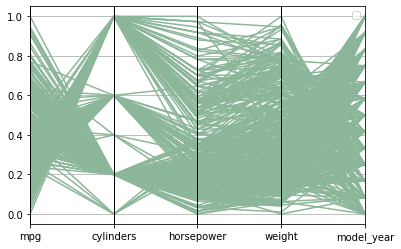

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


data=pd.read_csv('data/mpg.csv',encoding = 'ISO-8859-1')


##normalise data
data['mpg'] = (data['mpg']-data['mpg'].min())/(data['mpg'].max()-data['mpg'].min())
data['weight'] = (data['weight']-data['weight'].min())/(data['weight'].max()-data['weight'].min())
data['cylinders'] = (data['cylinders']-data['cylinders'].min())/(data['cylinders'].max()-data['cylinders'].min())
data['horsepower'] = (data['horsepower']-data['horsepower'].min())/(data['horsepower'].max()-data['horsepower'].min())
data['model_year'] = (data['model_year']-data['model_year'].min())/(data['model_year'].max()-data['model_year'].min())

###Set 'name' to be empty since it is a string.   'name' is  the class feature used to color the objects, but for this
## case we just want all objects to be the same colour, hence we make it empty.  More generally, one can use a categorical
##feature to determine the line colors.  

data['name']=''

###plot in parallel co-ordinates
#a document showing the parallel-coordinates API is at
#https://groups.google.com/forum/#!topic/glue-viz/5-ljzYj4Qnc

parallel_coordinates(data[['mpg','cylinders','horsepower','weight','model_year','name']],'name')
plt.show()


### Question 1

Consider this parallel co-ordinates plot above.  What insights can obtain from this plot?    To make it easier to visualise, you may like to display fewer car_models (objects) using pandas.DataFrame.sample(...)


### Question 1 answer
See discussion at
https://eagereyes.org/techniques/parallel-coordinates

### Question 2
Select car models with years in the range 1980-1982 and make them green in the parallel co-ordinates plot.  Colour all others car models red.  This technique is called "brushing", since it is used to make a particular subset of the objects stand out.   What do you notice?

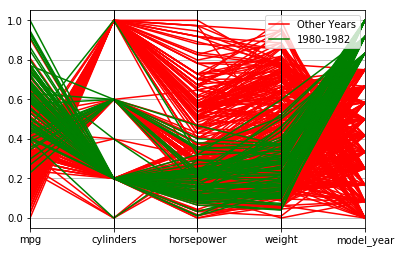

In [4]:
###Question 2 answer

import pandas as pd
import matplotlib.pyplot as plt
#from pandas.tools.plotting import parallel_coordinates
from pandas.plotting import parallel_coordinates

data=pd.read_csv('data/mpg.csv',encoding = 'ISO-8859-1')
data['selected']=['1980-1982' if ((x>=80) and (x<=82)) else 'Other Years' for x in data['model_year']]

#for x in data['model_year']:
#    if ((x>=80) and (x<=82)):
#        data['selected'] = '1980-1982'
#    else:
#        data['selected'] = 'Other Years'
        
###Normalise features between 0 and 1, to ensure comparability of axes
#data['name']=''
data['mpg'] = (data['mpg']-data['mpg'].min())/(data['mpg'].max()-data['mpg'].min())
data['weight'] = (data['weight']-data['weight'].min())/(data['weight'].max()-data['weight'].min())
data['cylinders'] = (data['cylinders']-data['cylinders'].min())/(data['cylinders'].max()-data['cylinders'].min())
data['horsepower'] = (data['horsepower']-data['horsepower'].min())/(data['horsepower'].max()-data['horsepower'].min())
data['model_year'] = (data['model_year']-data['model_year'].min())/(data['model_year'].max()-data['model_year'].min())

###plot in parallel co-ordinates
parallel_coordinates(data[['mpg','cylinders','horsepower','weight','model_year','selected']],'selected',color=["r","g"])
plt.show()

In [13]:
### Question 3
Produce a satter plot matrix from The following dataset ["Auto MPG"](data/mpg.csv) using **seaborn**. What patterns do you notice?

Object `notice` not found.


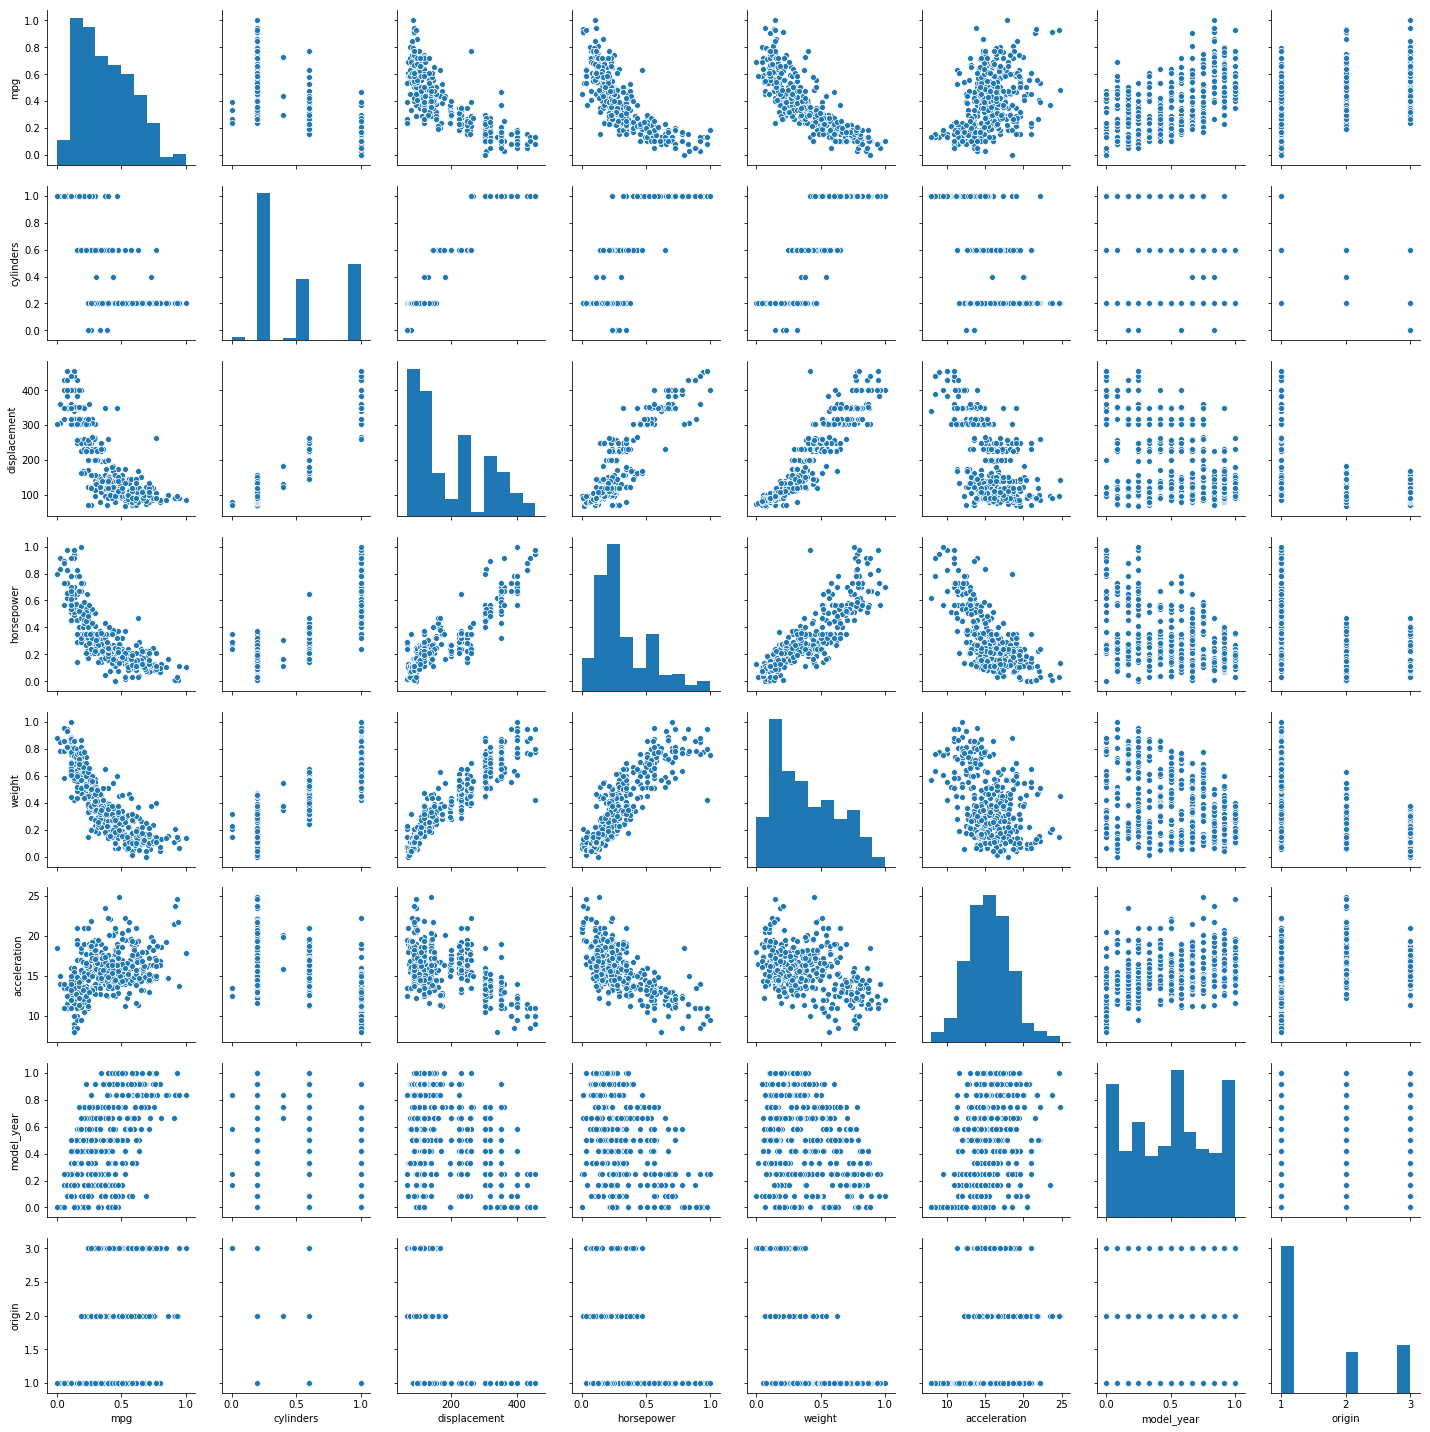

In [12]:
###Question 3 answer

import seaborn as sns

sns.pairplot(data)

### Question 3 patterns answers:
e.g.:
    
positive correlation: horsepower vs weight
    
check outlier weight vs displacements 

check outlier weight vs horsepower

two clusters acceleration vs weight 

negative coorelation weight vs mpg (but not linear)

negative coorelation horsepower vs mpg (but not linear)

mpg is right skewed
